### Project- Graduate Admissions analysis and prediction. (classification) - Nehal Bendale

### About Dataset
This dataset is inspired by the UCLA Graduate Dataset and is created by Mohan S Acharya to estimate chances of graduate admission from an Indian perspective.
This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.

# Probleam statement 

Perform Exploratory Data Analysis (EDA) tasks
a) Visualize the 10 random rows of the data set
b) Generate the description for numeric variables
c) Check the shape of the data set
d) Generate the correlation matrix
e) Generate a correlogram

Find out the minimum and maximum values for GRE
score

Find out the percentage of universities for each
university rating

Convert the target variable “Chance of Admit” to
categorical having values 0 and 1,such that :
Students having the “Chance of Admit” value > 0.80, are assigned
value 1, and
Students having the “Chance of Admit” value < 0.80, are assigned
value 0
Where 0: Low chance of Admission and 1: High chance of
admission

Build a Decision Tree classifier, to predict whether a
student has a low or high chance of admission to a chosen
university. Perform Hyperparameter Tuning to improve
the accuracy of the model.

Build a Random Forest classifier, to predict whether a
student has a low or high chance of admission to a chosen
university

Also use Ensemble Modelling techniques, to predict
whether a student has a low or high chance of admission
to a chosen university

Compare all of the models and justify your choice about
the optimum model.

In [79]:
#Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
! pip install XgBoost
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn import tree,metrics
import warnings
warnings.filterwarnings("ignore")

In [80]:
#Load the data
df=pd.read_csv("admission.csv")

In [81]:
#EDA (Head)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Conclusion=The data has been loaded and there is no need of modification.

In [82]:
#Drop unwanted col
del df["Serial No."]

In [83]:
#EDA (Shape)
df.shape

(500, 8)

Conclusion=There are 500 rows and 9 cols.

In [84]:
#EDA (Size)
df.size

4000

Conclsuion= There are 4500 data pts.

In [85]:
#EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


Conclusion=The data matches with the dtype hence there is no need of change of dtype.

In [86]:
#EDA (Describe)
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Conclusion=As there is difference between median and mean the data cols seem to be skewed. 

In [87]:
#EDA (Corr)
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


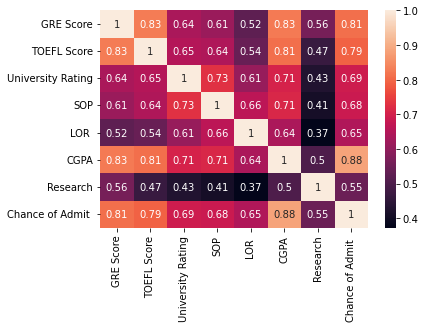

In [88]:
#EDA (Heat map of corr)
sns.heatmap(df.corr(),annot=True);

Conclusion=The target col has highest corr with CGPA.

In [89]:
#EDA (Max and min GRE Score)
print("Max GRE Score is",df["GRE Score"].max())
print("Min GRE Score is",df["GRE Score"].min())

Max GRE Score is 340
Min GRE Score is 290


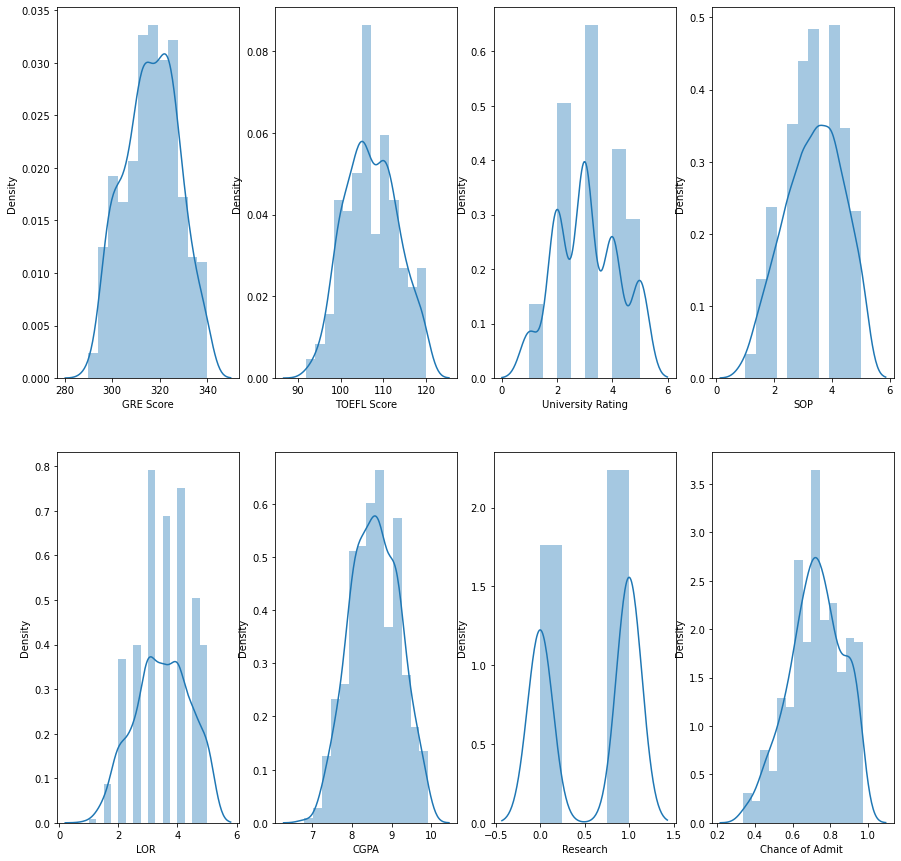

In [90]:
#Data visulization
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=[15,15])
for col,sub in zip(df.columns,ax.flatten()):
    sns.distplot(df[col],ax=sub)

In [91]:
#Missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

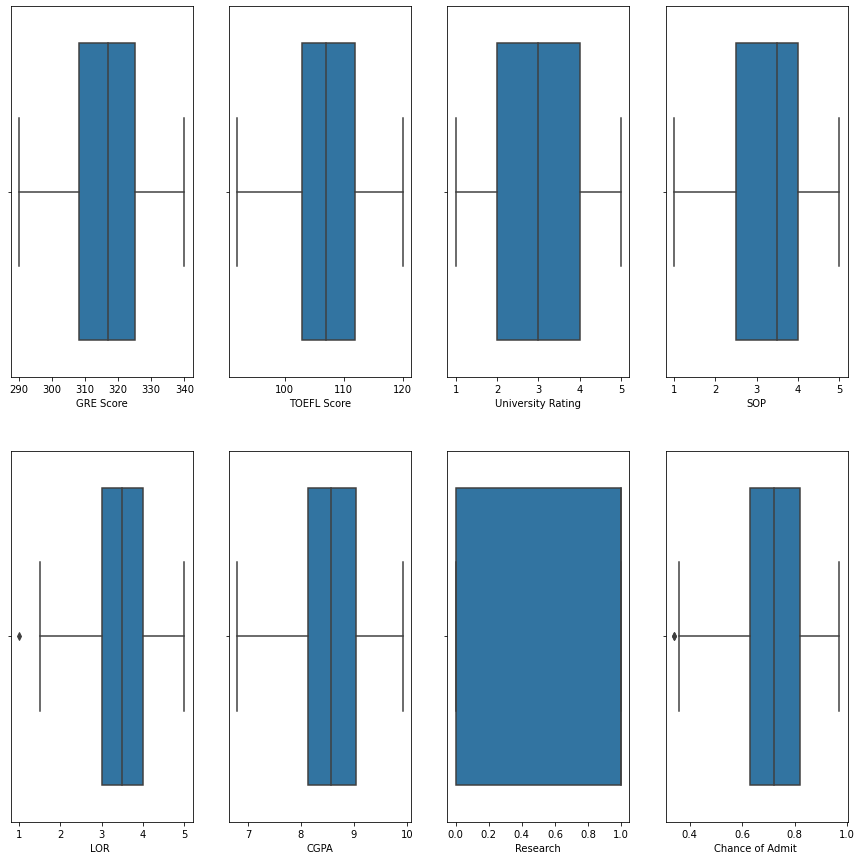

In [92]:
#Outliers
fig,ax=plt.subplots(nrows=2,ncols=4,figsize=[15,15])
for col,sub in zip(df.columns,ax.flatten()):
    sns.boxplot(df[col],ax=sub)

Conclusion=There are no outliers.

In [93]:
#Conversion of target col 
df["Chance of Admit "]=np.where(df["Chance of Admit "]>=0.8,1,df["Chance of Admit "])
df["Chance of Admit "]=np.where(df["Chance of Admit "]<0.8,0,df["Chance of Admit "])

Convert the target variable “Chance of Admit” to
categorical having values 0 and 1,such that :

Students having the “Chance of Admit” value > 0.80, are assigned
value 1, and

Students having the “Chance of Admit” value < 0.80, are assigned
value 0

Where 0: Low chance of Admission and 1: High chance of
admission


In [94]:
#Checking the df
df

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,1.0
1,324,107,4,4.0,4.5,8.87,1,0.0
2,316,104,3,3.0,3.5,8.00,1,0.0
3,322,110,3,3.5,2.5,8.67,1,1.0
4,314,103,2,2.0,3.0,8.21,0,0.0
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,1.0
496,337,117,5,5.0,5.0,9.87,1,1.0
497,330,120,5,4.5,5.0,9.56,1,1.0
498,312,103,4,4.0,5.0,8.43,0,0.0


In [95]:
#Data standardization
X=df.drop("Chance of Admit ",axis=1)
y=df[["Chance of Admit "]]
ss=StandardScaler()
ScaledX=ss.fit_transform(X)

In [96]:
#Train test split
X_train,X_test,y_train,y_test=train_test_split(ScaledX,y,train_size=0.8)

# Decision Tree 

In [97]:
#Algorithm
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [98]:
#Traning and testing score
print("Training score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Training score is 1.0
Testing score is 0.94


Conclusion=The training is very good but improvement in testing required.

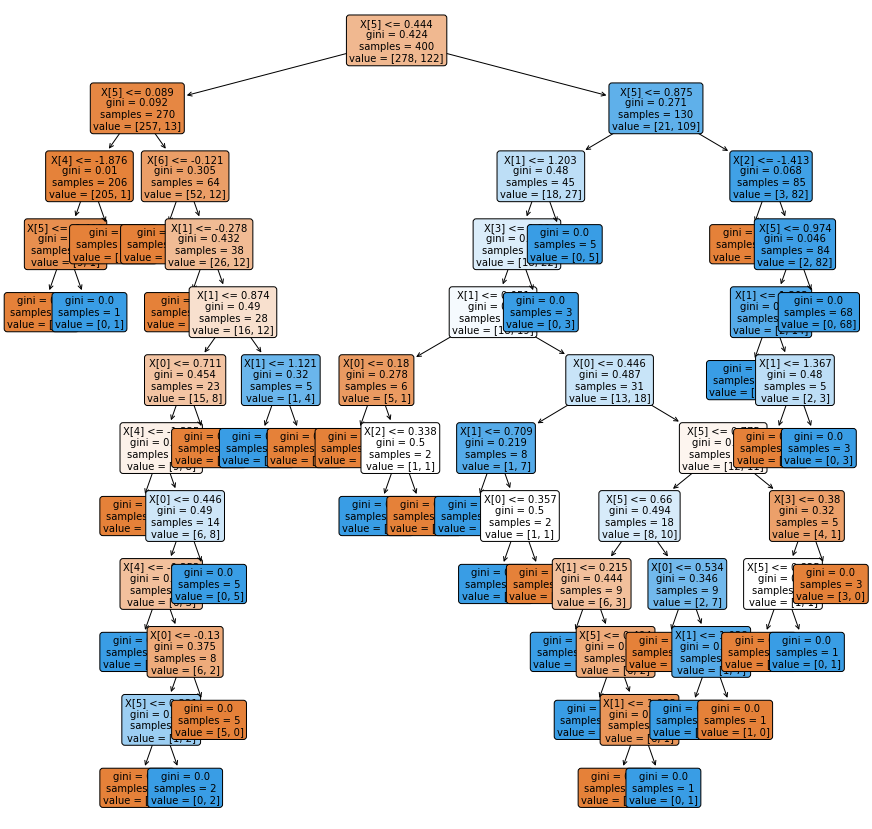

In [99]:
#Plot of tree
plt.figure(figsize=[15,15])
tree.plot_tree(DT,filled=True,rounded=True,fontsize=10);

Conclusion=The tree can be pruned so that we can make better decision.

In [100]:
#Performance Parameters
predicted=DT.predict(X_test)
print("Accuracy is",metrics.accuracy_score(predicted,y_test))
print("Precison is",metrics.precision_score(predicted,y_test))
print("Recall is",metrics.recall_score(predicted,y_test))

Accuracy is 0.94
Precison is 0.9090909090909091
Recall is 0.9090909090909091


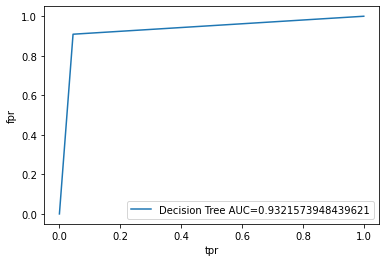

In [101]:
#AUC value
predict_DT_paro=DT.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_DT_paro)
AUC=metrics.roc_auc_score(y_test,predict_DT_paro)
plt.plot(fpr,tpr,label="Decision Tree AUC="+str(AUC))
plt.legend(loc=4)
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()

In [102]:
#Hyper parametric tunning
hyperpara=dict(max_depth=[1,2,3,4,5],min_samples_split=[1,5,10,50,100],min_samples_leaf=[1,5,10,50,100])
#GridSearch
Grid=GridSearchCV(DT,param_grid=hyperpara,n_jobs=-1,cv=10)
#Grid fit
Grid.fit(X_train,y_train)
#Best estimator
Grid.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=10, min_samples_split=5)

In [103]:
#New DT
DT_p=DecisionTreeClassifier(max_depth=4, min_samples_split=5)
DT_p.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

In [104]:
#Traning and testing score
print("Training score is",DT_p.score(X_train,y_train))
print("Testing score is",DT_p.score(X_test,y_test))

Training score is 0.92
Testing score is 0.95


Conclusion=The training score has reduced and the testing has increased.

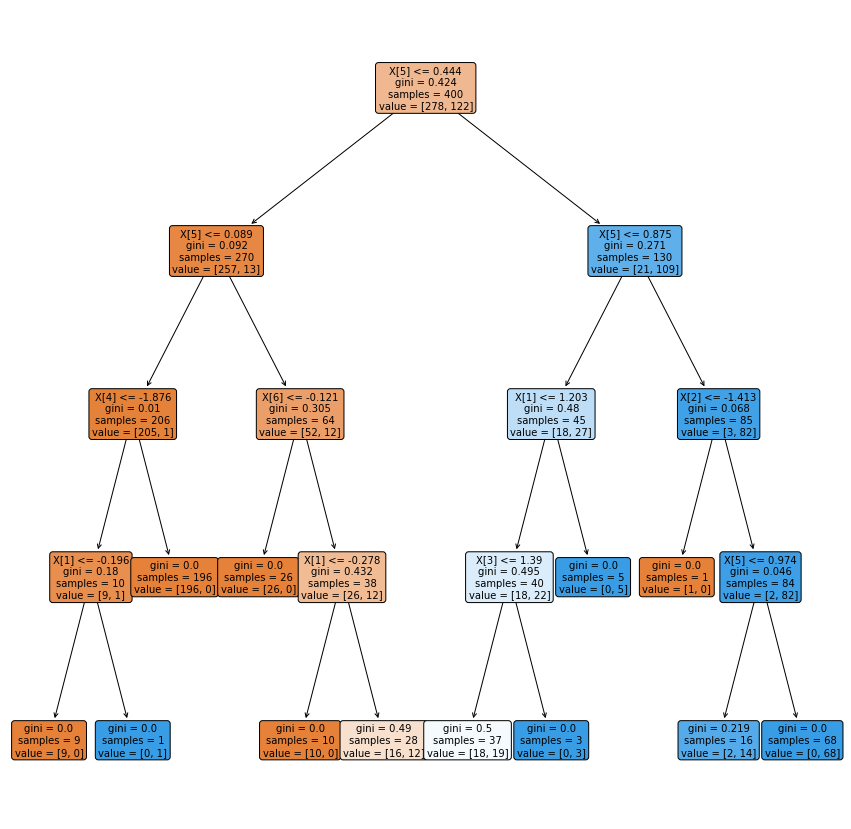

In [105]:
#Plot of tree
plt.figure(figsize=[15,15])
tree.plot_tree(DT_p,filled=True,rounded=True,fontsize=10);

Conclusion=We can make decision better now.

In [106]:
#Performance Parameters
predicted_p=DT_p.predict(X_test)
print("Accuracy is",metrics.accuracy_score(predicted_p,y_test))
print("Precison is",metrics.precision_score(predicted_p,y_test))
print("Recall is",metrics.recall_score(predicted_p,y_test))

Accuracy is 0.95
Precison is 1.0
Recall is 0.868421052631579


Conclusion=The performance has increased.

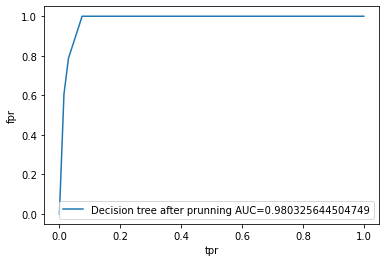

In [107]:
#AUC value
predict_DT_p_paro=DT_p.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_DT_p_paro)
AUC=metrics.roc_auc_score(y_test,predict_DT_p_paro)
plt.plot(fpr,tpr,label="Decision tree after prunning AUC="+str(AUC))
plt.legend(loc=4)
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()

Conclusion=There is increase in AUC value there is increase in performance.

# Random Forest

In [108]:
#Algorithm
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [109]:
#Traning and testing score
print("Training score is",RF.score(X_train,y_train))
print("Testing score is",RF.score(X_test,y_test))

Training score is 1.0
Testing score is 0.95


Conclusion=Good traning and testing score.

In [110]:
#Performance Parameters
predicted_RF=RF.predict(X_test)
print("Accuracy is",metrics.accuracy_score(predicted_RF,y_test))
print("Precison is",metrics.precision_score(predicted_RF,y_test))
print("Recall is",metrics.recall_score(predicted_RF,y_test))

Accuracy is 0.95
Precison is 0.9090909090909091
Recall is 0.9375


Conclusion=Very good performance parameters.

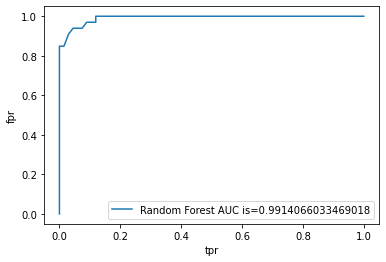

In [111]:
#AUC score
predict_RF_paro=RF.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_RF_paro)
AUC=metrics.roc_auc_score(y_test,predict_RF_paro)
plt.plot(fpr,tpr,label="Random Forest AUC is="+str(AUC))
plt.legend(loc=4)
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()

Conclusion=Very good AUC value.

# Adaboost

In [112]:
#Algorithm
AD=AdaBoostClassifier()
#Fit
AD.fit(X_train,y_train)

AdaBoostClassifier()

In [113]:
#Traning and testing score
print("Training score is",AD.score(X_train,y_train))
print("Testing score is",AD.score(X_test,y_test))

Training score is 0.965
Testing score is 0.95


Conclusion=The traning and testing is very good.

In [114]:
#Performance Parameters
predicted_AD=AD.predict(X_test)
print("Accuracy is",metrics.accuracy_score(predicted_AD,y_test))
print("Precison is",metrics.precision_score(predicted_AD,y_test))
print("Recall is",metrics.recall_score(predicted_AD,y_test))

Accuracy is 0.95
Precison is 0.9393939393939394
Recall is 0.9117647058823529


Conclusion=The performance parameters are very good.

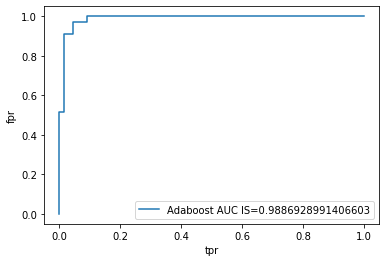

In [115]:
#AUC score
predict_AD_paro=AD.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_AD_paro)
AUC=metrics.roc_auc_score(y_test,predict_AD_paro)
plt.plot(fpr,tpr,label="Adaboost AUC IS="+str(AUC))
plt.legend(loc=4)
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()

# Gradient Boost

In [116]:
#Algorithm
GB=GradientBoostingClassifier()
#Fit
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [117]:
#Traning and testing score
print("Training score is",GB.score(X_train,y_train))
print("Testing score is",GB.score(X_test,y_test))

Training score is 0.99
Testing score is 0.94


Conclusion=Good traning and testing.

In [118]:
#Performance Parameters
predicted_GB=GB.predict(X_test)
print("Accuracy is",metrics.accuracy_score(predicted_GB,y_test))
print("Precison is",metrics.precision_score(predicted_GB,y_test))
print("Recall is",metrics.recall_score(predicted_GB,y_test))

Accuracy is 0.94
Precison is 0.9393939393939394
Recall is 0.8857142857142857


Conclusion=The performance parameters are very good.

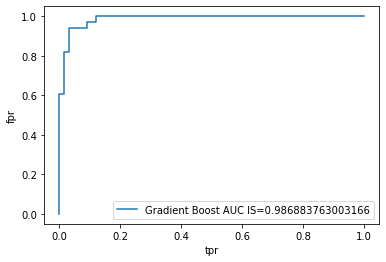

In [119]:
#AUC score
predict_GB_paro=GB.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_GB_paro)
AUC=metrics.roc_auc_score(y_test,predict_GB_paro)
plt.plot(fpr,tpr,label="Gradient Boost AUC IS="+str(AUC))
plt.legend(loc=4)
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()

Conclusion=The AUC value is very good.

# XgBoost

In [120]:
#Algorithm
XG=XGBClassifier()
#Fit
XG.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [121]:
#Traning and testing score
print("Training score is",XG.score(X_train,y_train))
print("Testing score is",XG.score(X_test,y_test))

Training score is 0.9975
Testing score is 0.96


Conclusion=The traning and testing is very good.

In [122]:
#Performance Parameters
predicted_XG=XG.predict(X_test)
print("Accuracy is",metrics.accuracy_score(predicted_XG,y_test))
print("Precison is",metrics.precision_score(predicted_XG,y_test))
print("Recall is",metrics.recall_score(predicted_XG,y_test))

Accuracy is 0.96
Precison is 0.9393939393939394
Recall is 0.9393939393939394


Conclusion=We have good very good performance measures.

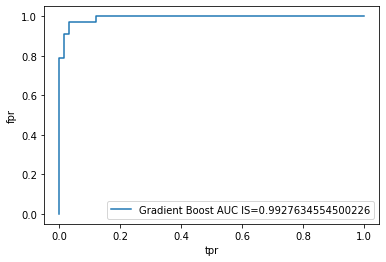

In [123]:
#AUC score
predict_XG_paro=XG.predict_proba(X_test)[::,-1]
fpr,tpr,_=metrics.roc_curve(y_test,predict_XG_paro)
AUC=metrics.roc_auc_score(y_test,predict_XG_paro)
plt.plot(fpr,tpr,label="Gradient Boost AUC IS="+str(AUC))
plt.legend(loc=4)
plt.xlabel("tpr")
plt.ylabel("fpr")
plt.show()

Conclusion=The AUC value is not the highest.

# Result

In [124]:
#Result
result=pd.DataFrame({"Algorithm":["Decision Tree","Random Forest","Adaboost","Gradient Boost","XgBoots"],"Accuracy":[0.93,0.91,0.96,0.91,0.92],"Precision":[0.90,0.86,0.86,0.83,0.86],"Recall":[0.87,0.83,0.86,0.86,0.86],"AUC":[0.94,0.97,0.980,0.984,0.96]})

In [125]:
result

,Algorithm,Accuracy,Precision,Recall,AUC
0,Decision Tree,0.93,0.90,0.87,0.940
1,Random Forest,0.91,0.86,0.83,0.970
2,Adaboost,0.96,0.86,0.86,0.980
3,Gradient Boost,0.91,0.83,0.86,0.984
4,XgBoots,0.92,0.86,0.86,0.960


Conclusion=We have choosen Gradient Boost for further predictions.